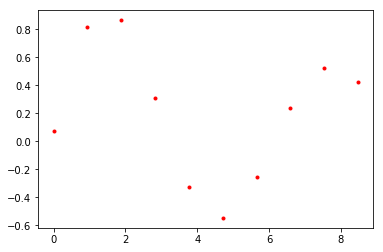

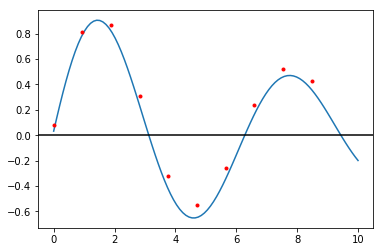

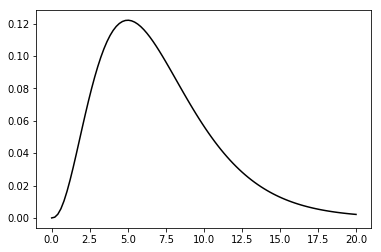

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

df = 7

np.random.seed(500)
rand = np.random.random()

t = np.arange(0,3*np.pi,0.3*np.pi)    

def fitfunc(t,a,om,phi,b):
    return (a*np.sin(om*t + phi)*np.exp(-b*t))

noise = 0.4*rand - 0.2
data = fitfunc(t,1,1,0,0.1) + noise
plt.plot(t,data,'r.')
plt.show()

fit, pcov = curve_fit(fitfunc, t, data)
x = np.linspace(0,10,100)
y = fitfunc(x, *fit)
plt.plot(x,y)
plt.plot(t,data,'r.')
plt.axhline(y=0, color = "k")
plt.show()

from scipy.stats import chi2
x = np.linspace(0,20,100)
plt.plot(x,chi2.pdf(x,df), color = "k")



In [6]:
sigsquared = 2/150
sig = np.sqrt(sigsquared)

def chisquare(t,y):
    return sum(data-fitfunc(t,*fit))**2/sigsquared



In [9]:
ij = 100
a = np.linspace(0.4, 1.3,ij)
b = np.linspace(-0.04,0.2,ij)
X, Y = np.meshgrid(a,b)
for i in range(ij):
    for j in range(ij):
        P = np.empty(shape=(100,100))
        fff = fitfunc(t, a[i], *fit[1], *fit[2], b[j])
        g = chisquare(data, fff)


TypeError: fitfunc() argument after * must be an iterable, not numpy.float64

The best set of parameters is defined to be a_o whose components minimize the quadratic deviation chi2

chi2 = sum of ((data-fitfunc)/sigma)**2
fitfunc is suitable, errors are uncorrelated and follow gaussian distribution

probability = incomplete gamma function,
has N-M independent variables,
for large N-M, ----> gaussian

chi not 2 must not be too small since our data points do have statistical errors

confidence interval = the probability interval that we want to accept.
small deviations, contours are ellipsoids

pdf yields the integrand
cdf yields the integral
quantile (ppf) = probability is inverted

The return value popt contains the best-fit values of the parameters. The return value pcov contains the covariance (error) matrix for the fit parameters

Quantile[dist,q] is equivalent to InverseCDF[dist,q].


In [ ]:
#Fig 1.10. Contours of constant chi^2 for P(Delta) = 0.68 and P(delta) = 0.90

#om angular frequency

#(a,b) slice shows that variations of amplitude can be compensated for by a change in time constant of damping (1/b) 
#without reducing the fit quality
#Specify the cut along the optimum value of b for the projection onto a-axis
# It is not possible to determine the upper limit of the time constant (1/b) since the contour of the outer confidence region
#passes through b = 0 (b>1/inf)

#(om,b) (x,y)
#True valuesom=1 b=0.1 lie close to the edge of the inner confidence region
#Confidence interval should not be narrow
#Compensation does not happen

#Fig 1.11
#2 extrema from contour (a,b): (1.3,0.15) and (0.5,0)
#Both still represents data well
#Small no. of data does not permit better fit

#Fig 1.12
#Take optimum parameter a_0
#even more than 90% of data falls within outer contour

In [ ]:
from scipy.stats import chi2

def square(t,y):
    return ((y-fitfunc(t))**2)/sigsquared

chi2


ChiSquareDistribution[ν] represents a statistical distribution parametrized by a positive value ν indicating the degrees of freedom of the distribution. ν determines the general shape of the probability density function (PDF) of a chi-square distribution, and, depending on the values of ν, the PDF may be either monotonic decreasing or may have a single "peak" (i.e. a global maximum) with a potential singularity approaching the lower boundary of its domain. 
ChiSquareDistribution is the distribution followed by the square of a chi-distributed random variable. In other words, if  is a random variable and  (where  denotes "is distributed as"), then . The sum  of a collection , , …,  of identically normally distributed independent random variables is also chi-square distributed. 

The chi-square distribution can be used to quantify the goodness of fit between a theoretical or empirical model and a collection of samples. 

In [ ]:
help(chi2)

In [ ]:
def getChi(Pa, Ps_theory, Fab_matrix):
    chisquare = linalg.transpose(Pa-Ps_theory).dot(Fab_matrix).dot(Pa-Ps_theory)
    return chisquare

n = 64
sigma = 3.
key = np.arange(n, dtype=float)
sigma_hat = (float(n)/(2.*np.pi*sigma))
A_list = np.arange(0.1, 0.7, 0.01)

for a in A_list:
    for s in np.arange(sigma_hat-3.5, sigma_hat+3.5, 0.01):
        Ps_theory = a*np.exp(-(key*key/(2.*s*s)))
        chi_square[a,s] = getChi(Pa, Ps_theory, Fab_matrix)
        
fig = plt.figure()
ax = figura.add_subplot(111)
ax.set_title('Contour_plots_Chi_square{}'.format(n))
ax.set_xlabel('A')
ax.set_ylabel('sigma')
plt.contour(A_list, np.arange(sigma_hat-3.5, sigma_hat+3.5, 0.01), chi_square)


In [ ]:
for i in range(20):
    plt.plot(x,chi2.pdf(x,i))


In [ ]:
x = np.linspace(0,20,200)
plt.plot(x,chi2.pdf(x,1))

In [ ]:
help(curve_fit)

In [ ]:
help(chi2.cdf)